## **Наивный байесовский классификатор**
Наивный байесовский классификатор (Naive Bayes classifier) — вероятностный классификатор на основе формулы Байеса со строгим (наивным) предположением о независимости признаков между собой при заданном классе, что сильно упрощает задачу классификации из-за оценки одномерных вероятностных плотностей вместо одной многомерной.

В данном случае, одномерная вероятностная плотность — это оценка вероятности каждого признака отдельно при условии их независимости, а многомерная — оценка вероятности комбинации всех признаков, что вытекает из случая их зависимости. Именно по этой причине данный классификатор называется наивным, поскольку позволяет сильно упростить вычисления и повысить эффективность алгоритма. Однако такое предположение не всегда является верным на практике и в ряде случаев может привести к значительному ухудшению качества прогнозов.

Сама же формула Байеса выглядит следующим образом:

$$P(A|B) = \frac{P(B|A) P(A)}{P(B)}$$

где:
- $P(A|B)$ — апостериорная вероятность события A при условии выполнения события B;

- $P(B|A)$ — условная вероятность события B при условии выполнения события A;

- $P(A)$ и $P(B)$ — априорные вероятности событий A и B соответственно.

А в контексте машинного обучения формула Байеса приобретает следующий вид:

$$P(y_k|X) = \frac{P(y_k)P(X|y_k)}{P(X)}$$

где:
- $P(y_k|X)$ — апостериорная вероятность принадлежности образца к классу $y_k$ с учётом его признаков $X$;
- $P(X|y_k)$ — правдоподобие, то есть вероятность признаков $X$ при заданном классе $y_k$;
- $P(y_k)$ — априорная вероятность принадлежности случайно выбранного наблюдения к классу $y_k$;
- $P(X)$ — априорная вероятность признаков $X$.

Если объект описывается не одним, а несколькими признаками $X_1, X_2, ..., X_n$, то формула принимает вид:

$$P(y_k|X_1, X_2, ..., X_n) = \frac{P(y_k)\prod_{i=1}^n P(X_i|y_k)}{P(X_1, X_2, ..., X_n)}$$

На практике числитель данной формулы представляет наибольший интерес, поскольку знаменатель зависит только от признаков, а не от класса, и поэтому часто он опускается при сравнении вероятностей разных классов. В конечном счёте правило классификации будет пропорционально выбору класса с максимальной апостериорной вероятностью:

$$y_k \propto \arg\max_{y_k} P(y_k)\prod_{i=1}^n P(X_i|y_k)$$

Для оценки параметров модели, то есть вероятностей $P(y_k)$ и $P(X_i|y_k)$, обычно применяется метод максимального правдоподобия, который в данном случае основан на частотах встречаемости классов и признаков в обучающей выборке.

### **Разновидности наивного Байеса**
В библиотеке scikit-learn есть несколько реализаций наивного байесовского классификатора, отличающиеся предположениями о распределении признаков при заданном классе. К таковым относятся следующие:

- **Гауссовский наивный байесовский классификатор (GaussianNB)** — вариант для работы с непрерывными признаками, которые имеют нормальное (гауссовское) распределение. Вероятность признака при заданном классе вычисляется по формуле: $$P(x_i|y) = \frac{1}{\sqrt{2\pi\sigma_y^2}}\exp\left(-\frac{(x_i-\mu_y)^2}{2\sigma_y^2}\right)$$ где $\mu_y$ и $\sigma_y$ — это среднее и стандартное отклонения признака в классе $y$. Эти параметры оцениваются с помощью метода максимального правдоподобия по обучающим данным.
- **Мультиномиальный наивный байесовский классификатор (MultinomialNB)** — вариант для работы с дискретными признаками, которые имеют мультиномиальное распределение. Такие признаки часто встречаются в задачах классификации текстов, где они представляют собой количество вхождений в тексте. Вероятность признака при заданном классе вычисляется по формуле: $$P(x_i|y) = \frac{N_{yi} + \alpha}{N_y + \alpha n}$$ где $N_{yi}$ — это количество раз, когда признак $i$ встречается в классе $y$; $N_y$ — общее количество всех признаков в классе $y$; $n$ — количество различных признаков; а $\alpha$ — сглаживающий параметр, предотвращающий возникновение нулевых вероятностей.
- **Комплементарный наивный байесовский классификатор (ComplementNB)** — улучшенный вариант *MultinomialNB*, подходящий для несбалансированных наборов данных. Вместо оценки вероятности признака при заданном классе, алгоритм оценивает нормированный вес признака $w_{ci}$ для класса $c$ как вероятность признака при дополнении класса, то есть при всех остальных классах. Таким образом, алгоритм учитывает не только частоту признаков в классе, но и их отсутствие в других классах, что делает его менее чувствительным к смещению выборки. Формула для вычисления вероятности признака при дополнении класса выглядит следующим образом: \begin{align}\begin{aligned}\hat{\theta}_{ci} = \frac{\alpha_i + \sum_{j:y_j \neq c} d_{ij}}
                         {\alpha + \sum_{j:y_j \neq c} \sum_{k} d_{kj}}\\w_{ci} = \log \hat{\theta}_{ci}\\w_{ci} = \frac{w_{ci}}{\sum_{j} |w_{cj}|}\end{aligned}\end{align}
где $\hat{\theta}_{ci}$ — это оценка вероятности признака $i$ при дополнении класса $c$, которая вычисляется с помощью сглаживающего параметра $\alpha_i$ и частоты признака $i$ во всех классах кроме $c$ (в данном случае $d_{ij}$ — это количество раз, когда признак $i$ встречается в классе $j$); $w_{ci}$ — это нормированный вес признака $i$ для класса $c$. Предсказанный класс $\hat c$ для заданного вектора признаков $t$ будет выглядеть следующим образом: $$\hat{c} = \arg\min_c \sum_{i} t_i w_{ci}$$
- **Бернуллиевский наивный байесовский классификатор (BernoulliNB)** — ещё один вариант для работы с дискретными признаками, но которые имеют бернуллиевское распределение. В данном случае признаки представляют собой бинарные индикаторы наличия или отсутствия определённых свойств в объекте. Например, в задаче классификации текстов это может быть наличие или отсутствие определённых слов в тексте. Вероятность признака при заданном классе вычисляется по формуле: $$P(x_i|y) = P(x_i = 1|y)x_i + (1-P(x_i = 1|y))(1-x_i)$$ где $P(x_i = 1|y)$ — это вероятность того, что признак $i$ принимает значение 1 (истина) при условии, что объект принадлежит классу $y$; $x_i$ — значение признака $i$ (0 или 1).
- **Категориальный наивный байесовский классификатор (CategoricalNB)** — вариант для категориально распределенных данных, основанный на предположении, что каждый описываемый индексом признак имеет своё собственное категориальное распределение. Вероятность признака при заданном классе вычисляется по формуле: $$P(x_i = t \mid y = c \: ;\, \alpha) = \frac{ N_{tic} + \alpha}{N_{c} + \alpha n_i}$$ где $N_{tic} = |\{j \in J \mid x_{ij} = t, y_j = c\}|$ — это количество раз, когда признак $x_i$ принимает значение $t$ в классе $c$; $N_{c} = |\{ j \in J\mid y_j = c\}|$ — общее количество всех признаков в классе $c$ в обучающих данных; $\alpha$ — сглаживающий параметр; $n_i$ — количество доступных значений признака $i$.

### **Принцип работы наивного байесовского классификатора c гауссовским распределением**
Алгоритм строится следующим образом:
- 1) изначально рассчитываются априорные вероятности классов;
- 2) после рассчитываются средние и стандартные отклонения признаков по классам;
- 3) на основе полученных отклонений признаков по классам рассчитывается вероятностная плотность тестовых признаков по распределению Гаусса;
- 4) далее вычисляются апостериорные вероятности как произведение априорных вероятностей классов и вероятностных плотностей тестовых признаков;
- 5) классы с максимальной апостериорной вероятностью будут итоговым прогнозом.

### **Наивный Байес в задачах фильтрации спама**
В контексте фильтрации спама наивный байесовский классификатор основан на частоте появления слов в сообщениях для спама и не спама, и максимизации произведения их вероятностей. Наивность в данном случае будет заключаться в предположении о независимости слов в сообщении от порядка и контекста. Тогда формула Байеса приобретает следующий вид:

$$P(C|M) \propto P(C) \prod_{i=1}^n P(w_i|C), \ \ w_i \in M$$

где:
- $C$ — класс спам или не спам;
- $M$ — сообщение;
- $w_i$ — i-е слово в сообщении $M$;
- $\propto$ — знак пропорциональности.

Для лучшего понимания рассмотрим следующий пример. Предположим, мы хотим классифицировать сообщение **"Hi, you won a discount and you can get the prize this evening."** и у нас есть обучающая выборка, состоящая из следующих сообщений:

| Message | Class |
| --- | --- |
| Hi, how are you? | Not spam |
| Congratulations, you won a prize! | Spam |
| Buy the product now and get a discount! | Spam |
| Let's walk this evening. | Not spam |

Первым делом необходимо рассчитать частоту появления всех уникальных слов и их общее количество в сообщениях для спама и не спама. Затем производится расчёт вероятностей встретить каждое слово в спам и не спам сообщениях на основе этих частот. Когда в сообщении есть слова, которые раньше не встречались в обучающей выборке, используется сглаживание. Существует много различных видов сглаживаний, но суть самого простого из них заключается в добавлении $1$ при подсчёте частот слов в сообщениях. Такой приём позволяет избежать проблему нулевой вероятности. Ниже приведена таблица с расчётом вероятностей для всех слов.

| Word | Frequency in Not Spam | Frequency in Spam | Probability in Not Spam | Probability in Spam  |
| --- | --- | --- | --- | --- |
| Hi | 1 + $1$ = 2 | 0 + $1$ = 1 | 2 / 28 = 0.0714 | 1 / 33 = 0.03 |
| how | 1 + $1$ = 2 | 0 + $1$ = 1 | 2 / 28 = 0.0714 | 1 / 33 = 0.03 |
| are | 1 + $1$ = 2 | 0 + $1$ = 1 | 2 / 28 = 0.0714 | 1 / 33 = 0.03 |
| you | 1 + $1$ = 2 | 1 + $1$ = 2 | 2 / 28 = 0.0714 | 2 / 33 = 0.06 |
| Congratulations | 0 + $1$ = 1 | 1 + $1$ = 2 | 1 / 28 = 0.0357 | 2 / 33 = 0.06 |
| won | 0 + $1$ = 1 | 1 + $1$ = 2 | 1 / 28 = 0.0357 | 2 / 33 = 0.06 |
| a | 0 + $1$ = 1 | 2 + $1$ = 3 | 1 / 28 = 0.0357 | 3 / 33 = 0.09 |
| prize | 0 + $1$ = 1 | 1 + $1$ = 2 | 1 / 28 = 0.0357 | 2 / 33 = 0.06 |
| Buy | 0 + $1$ = 1 | 1 + $1$ = 2 | 1 / 28 = 0.0357 | 2 / 33 = 0.06 |
| the | 0 + $1$ = 1 | 1 + $1$ = 2 | 1 / 28 = 0.0357 | 2 / 33 = 0.06 |
| product | 0 + $1$ = 1 | 1 + $1$ = 2 | 1 / 28 = 0.0357 | 2 / 33 = 0.06 |
| now | 0 + $1$ = 1 | 1 + $1$ = 2 | 1 / 28 = 0.0357 | 2 / 33 = 0.06 |
| and | 0 + $1$ = 1 | 1 + $1$ = 2 | 1 / 28 = 0.0357 | 2 / 33 = 0.06 |
| get | 0 + $1$ = 1 | 1 + $1$ = 2 | 1 / 28 = 0.0357 | 2 / 33 = 0.06 |
| discount | 0 + $1$ = 1 | 1 + $1$ = 2 | 1 / 28 = 0.0357 | 2 / 33 = 0.06 |
| Let's | 1 + $1$ = 2 | 0 + $1$ = 1 | 2 / 28 = 0.0714 | 1 / 33 = 0.03 |
| walk | 1 + $1$ = 2 | 0 + $1$ = 1 | 2 / 28 = 0.0714 | 1 / 33 = 0.03 |
| this | 1 + $1$ = 2 | 0 + $1$ = 1 | 2 / 28 = 0.0714 | 1 / 33 = 0.03 |
| evening | 1 + $1$ = 2 | 0 + $1$ = 1 | 2 / 28 = 0.0714 | 1 / 33 = 0.03 |
| can | 0 + $1$ = 1 | 0 + $1$ = 1 | 1 / 28 = 0.0357 | 1 / 33 = 0.03 |
| **Total amount of words** | **28** | **33** |

 В конце рассчитываются вероятности сообщения быть спамом или не спамом, а итоговым прогнозом будет класс с максимальной вероятностью.

$P(C|M) = P(C) \cdot P('Hi'|C) \cdot P('you'|C) \cdot P('won'|C) \cdot P('a'|C)
\cdot P('discount'|C) \cdot P('and'|C) \cdot P('you'|C) \cdot P('can'|C) \cdot P('get'|C)
\cdot P('the'|C) \cdot P('prize'|C) \cdot P('this'|C) \cdot P('evening'|C)$

Где:
- $C \in (Spam, \ \ Not \ \ Spam)$;
- $P(Spam) = P(Not \ \ Spam) = \frac{2}{4} = 0.5$



$P(Spam|M) = 0.5 \cdot 0.03 \cdot 0.06 \cdot 0.06 \cdot 0.09 \cdot 0.06 \cdot 0.06 \cdot 0.06 \cdot 0.03 \cdot 0.06 \cdot 0.06 \cdot 0.06 \cdot 0.03 \cdot 0.03 \approx 6.12 \cdot 10^{-18}$

$P(Not \ \ Spam|M) = 0.5 \cdot 0.0714 \cdot 0.0714 \cdot 0.0357 \cdot 0.0357 \cdot 0.0357 \cdot 0.0357 \cdot 0.0714 \cdot 0.0357 \cdot 0.0357 \cdot 0.0357 \cdot 0.0357 \cdot 0.0714 \cdot 0.0714 \approx 2.45 \cdot 10^{-18}$

$P(Spam|M) > P(Not \ \ Spam|M) \rightarrow$ **сообщение является спамом**

Стоит добавить, что на практике для удобства расчётов зачастую используется логарифм вероятности вместо самой вероятности.

### **Реализация на Python с нуля**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [8]:
class GaussianNaiveBayes:
    def fit(self, X, y):
        classes, cls_counts = np.unique(y, return_counts=True)
        n_classes = len(classes)
        self.priors = cls_counts / len(y)

        # calculate the mean and standard deviations of features by classes
        self.X_cls_mean = np.array([np.mean(X[y == c], axis=0) for c in range(n_classes)])
        self.X_stds = np.array([np.std(X[y == c], axis=0) for c in range(n_classes)])

    # calculate the probability density of the feature according to the Gaussian distribution
    def pdf(self, x, mean, std):
        return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x - mean) / std) ** 2)

    def predict(self, X):
        pdfs = np.array([self.pdf(x, self.X_cls_mean, self.X_stds) for x in X])
        posteriors = self.priors * np.prod(pdfs, axis=2)   # shorten Bayes formula

        return np.argmax(posteriors, axis=1)

In [9]:
def decision_boundary_plot(X, y, X_train, y_train, clf, feature_indexes, title=None):
    feature1_name, feature2_name = X.columns[feature_indexes]
    X_feature_columns = X.values[:, feature_indexes]
    X_train_feature_columns = X_train[:, feature_indexes]
    clf.fit(X_train_feature_columns, y_train)

    plot_decision_regions(X=X_feature_columns, y=y.values, clf=clf)
    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.title(title)

### **Загрузка датасета**

In [10]:
X1, y1 = load_iris(return_X_y=True, as_frame=True)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1.values, y1.values, random_state=0)
print(X1, y1, sep='\n')

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

### **Обучение моделей и оценка полученных результатов**
Не смотря на свою простоту, в данном случае алгоритм показал отличный результат, классифицировав правильно абсолютно все образцы, что возможно благодаря построению гибкой решающей границы с высокой обобщающей способностью. Из этого можно сделать интересный вывод, что в некоторых ситуациях более простые модели могут работать гораздо лучше, чем сложные, что можно будет заметить в дальнейшем на примере других алгоритмов.

**Naive Bayes**

In [11]:
nb_clf = GaussianNaiveBayes()
nb_clf.fit(X1_train, y1_train)
nb_clf_pred_res = nb_clf.predict(X1_test)
nb_clf_accuracy = accuracy_score(y1_test, nb_clf_pred_res)

print(f'Naive Bayes classifier accucacy: {nb_clf_accuracy}')
print(nb_clf_pred_res)

Naive Bayes classifier accucacy: 1.0
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


**Naive Bayes (scikit-learn)**

sk Naive Bayes classifier accucacy: 1.0
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


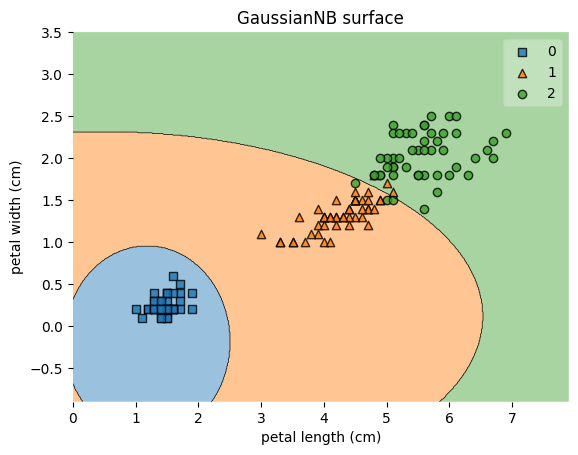

In [12]:
sk_nb_clf = GaussianNB()
sk_nb_clf.fit(X1_train, y1_train)
sk_nb_clf_pred_res = sk_nb_clf.predict(X1_test)
sk_nb_clf_accuracy = accuracy_score(y1_test, sk_nb_clf_pred_res)

print(f'sk Naive Bayes classifier accucacy: {sk_nb_clf_accuracy}')
print(sk_nb_clf_pred_res)

feature_indexes = [2, 3]
title1 = 'GaussianNB surface'
decision_boundary_plot(X1, y1, X1_train, y1_train, sk_nb_clf, feature_indexes, title1)

### **Преимущества и недостатки наивного байесовского классификатора**
Преимущества:
- простота в реализации и интерпретации;
- практически не требуется настройка параметров;
- высокая скорость работы и точность прогнозов во многих ситуациях;
- имеет относительно хорошую устойчивость к шуму и выбросам, поскольку основан на вероятностных распределениях и наивном предположении о независимости признаков.

Недостатки:
- в случае нарушения предположения о независимости признаков, точность прогнозов может значительно снизиться;
- может отдавать предпочтение к классам с бОльшим количеством образцов в случае несбалансированных данных.


### **Дополнительные источники**
Статья «Bayes and Naive-Bayes Classifier», Rajiv Gandhi, Andhra Pradesh.

Документация:
- [описание наивного Байеса](https://scikit-learn.org/stable/modules/naive_bayes.html);
- [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB);
- [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB);
- [ComplementNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB);
- [BernoulliNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB);
- [CategoricalNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html#sklearn.naive_bayes.CategoricalNB).

Видео: [один](https://www.youtube.com/watch?v=O2L2Uv9pdDA), [два](https://www.youtube.com/watch?v=H3EjCKtlVog), [три](https://www.youtube.com/watch?v=nt63k3bfXS0), [четыре](https://www.youtube.com/watch?v=ADj95edZc0w).

